<a href="https://colab.research.google.com/github/h-e-d-g-e-h-o-g/Asian_Games_Analysis/blob/main/Asian_Games_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

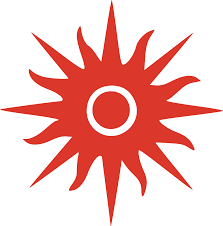<br>
#Introduction
As the world's attention converges on the grand stage of the ongoing Asian Games, I embark on an exploration into the historical narratives and contemporary athletic achievements of Asian nations.<br>The **Asian Games**, also known as the Asiad, is a multi-sport event held every four years, with athletes from countries across Asia participating. It is one of the largest and most prestigious sporting events in the world. In the realm of sports, the Asian Games stand as a testament to the athletic prowess and competitive spirit of nations across Asia. Delving into a comprehensive dataset spanning the Asian Games' history since ***1951***, I set out on a journey to uncover the dynamics of dominance in 28 athletic events. While the primary goal was to uncover which countries excel in each event, the data revealed a richer narrative — one that conveys the historical narratives of Asian countries.  

###Data Source
- Asian Games medal tally dataset:- https://www.kaggle.com/datasets/srikarkashyap/asiangamestop10
- Athletic Records:- https://www.kaggle.com/datasets/kavya2099/asian-games-athletics-winning-countries19512018

#####Plotly upgrade

In [ ]:
# %pip install --upgrade plotly

####Import Statements

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio

####Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

###Reading the data

In [ ]:
medal_tally_df = pd.read_csv("asiangamestop10.csv")

##Data Exploration and Cleaning

In [ ]:
print(f"The shape of the medal_tally DataFrame is {medal_tally_df.shape}")

The shape of the medal_tally DataFrame is (444, 6)


In [ ]:
medal_tally_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    444 non-null    int64 
 1   NOC     444 non-null    object
 2   Gold    444 non-null    int64 
 3   Silver  444 non-null    int64 
 4   Bronze  444 non-null    int64 
 5   Total   444 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 20.9+ KB


#####Columns in the DataFrame

In [ ]:
medal_tally_df.columns

Index(['Year', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

In [ ]:
print(f"The First Asian Games were held in {medal_tally_df.Year.min()}.")

The First Asian Games were held in 1951.


In [ ]:
print(f"The latest data regarding Asian Games in the dataset is of {medal_tally_df.Year.max()}.")

The latest data regarding Asian Games in the dataset is of 2018.


####Checking Duplicates

In [ ]:
medal_tally_df[medal_tally_df.duplicated()].values.any()

False

There is no duplicated row in the dataframe.

####Checking NaN Values

In [ ]:
medal_tally_df.isna().values.any()

False

There is no NaN values in the dataframe.

In [ ]:
medal_tally_df.head(10)

,Year,NOC,Gold,Silver,Bronze,Total
0,1951,Japan (JPN),24,21,15,60
1,1951,India (IND),15,16,20,51
2,1951,Iran (IRI),8,6,2,16
3,1951,Singapore (SGP),5,7,2,14
4,1951,Philippines (PHI),5,6,8,19
5,1951,Ceylon (CEY),0,1,0,1
6,1951,Indonesia (INA),0,0,5,5
7,1951,Burma (BIR),0,0,3,3
8,1954,Japan (JPN),38,36,24,98
9,1954,Philippines (PHI),14,14,17,45


Here, we can see all the first 20 records of the dataframe.

##Medal Counts year by year

In [ ]:
medal_count_data = medal_tally_df.groupby("Year", as_index=False).agg({'Total': pd.Series.sum})
medal_count_data

,Year,Total
0,1951,169
1,1954,229
2,1958,350
3,1962,372
4,1966,450
5,1970,423
6,1974,609
7,1978,626
8,1982,614
9,1986,848


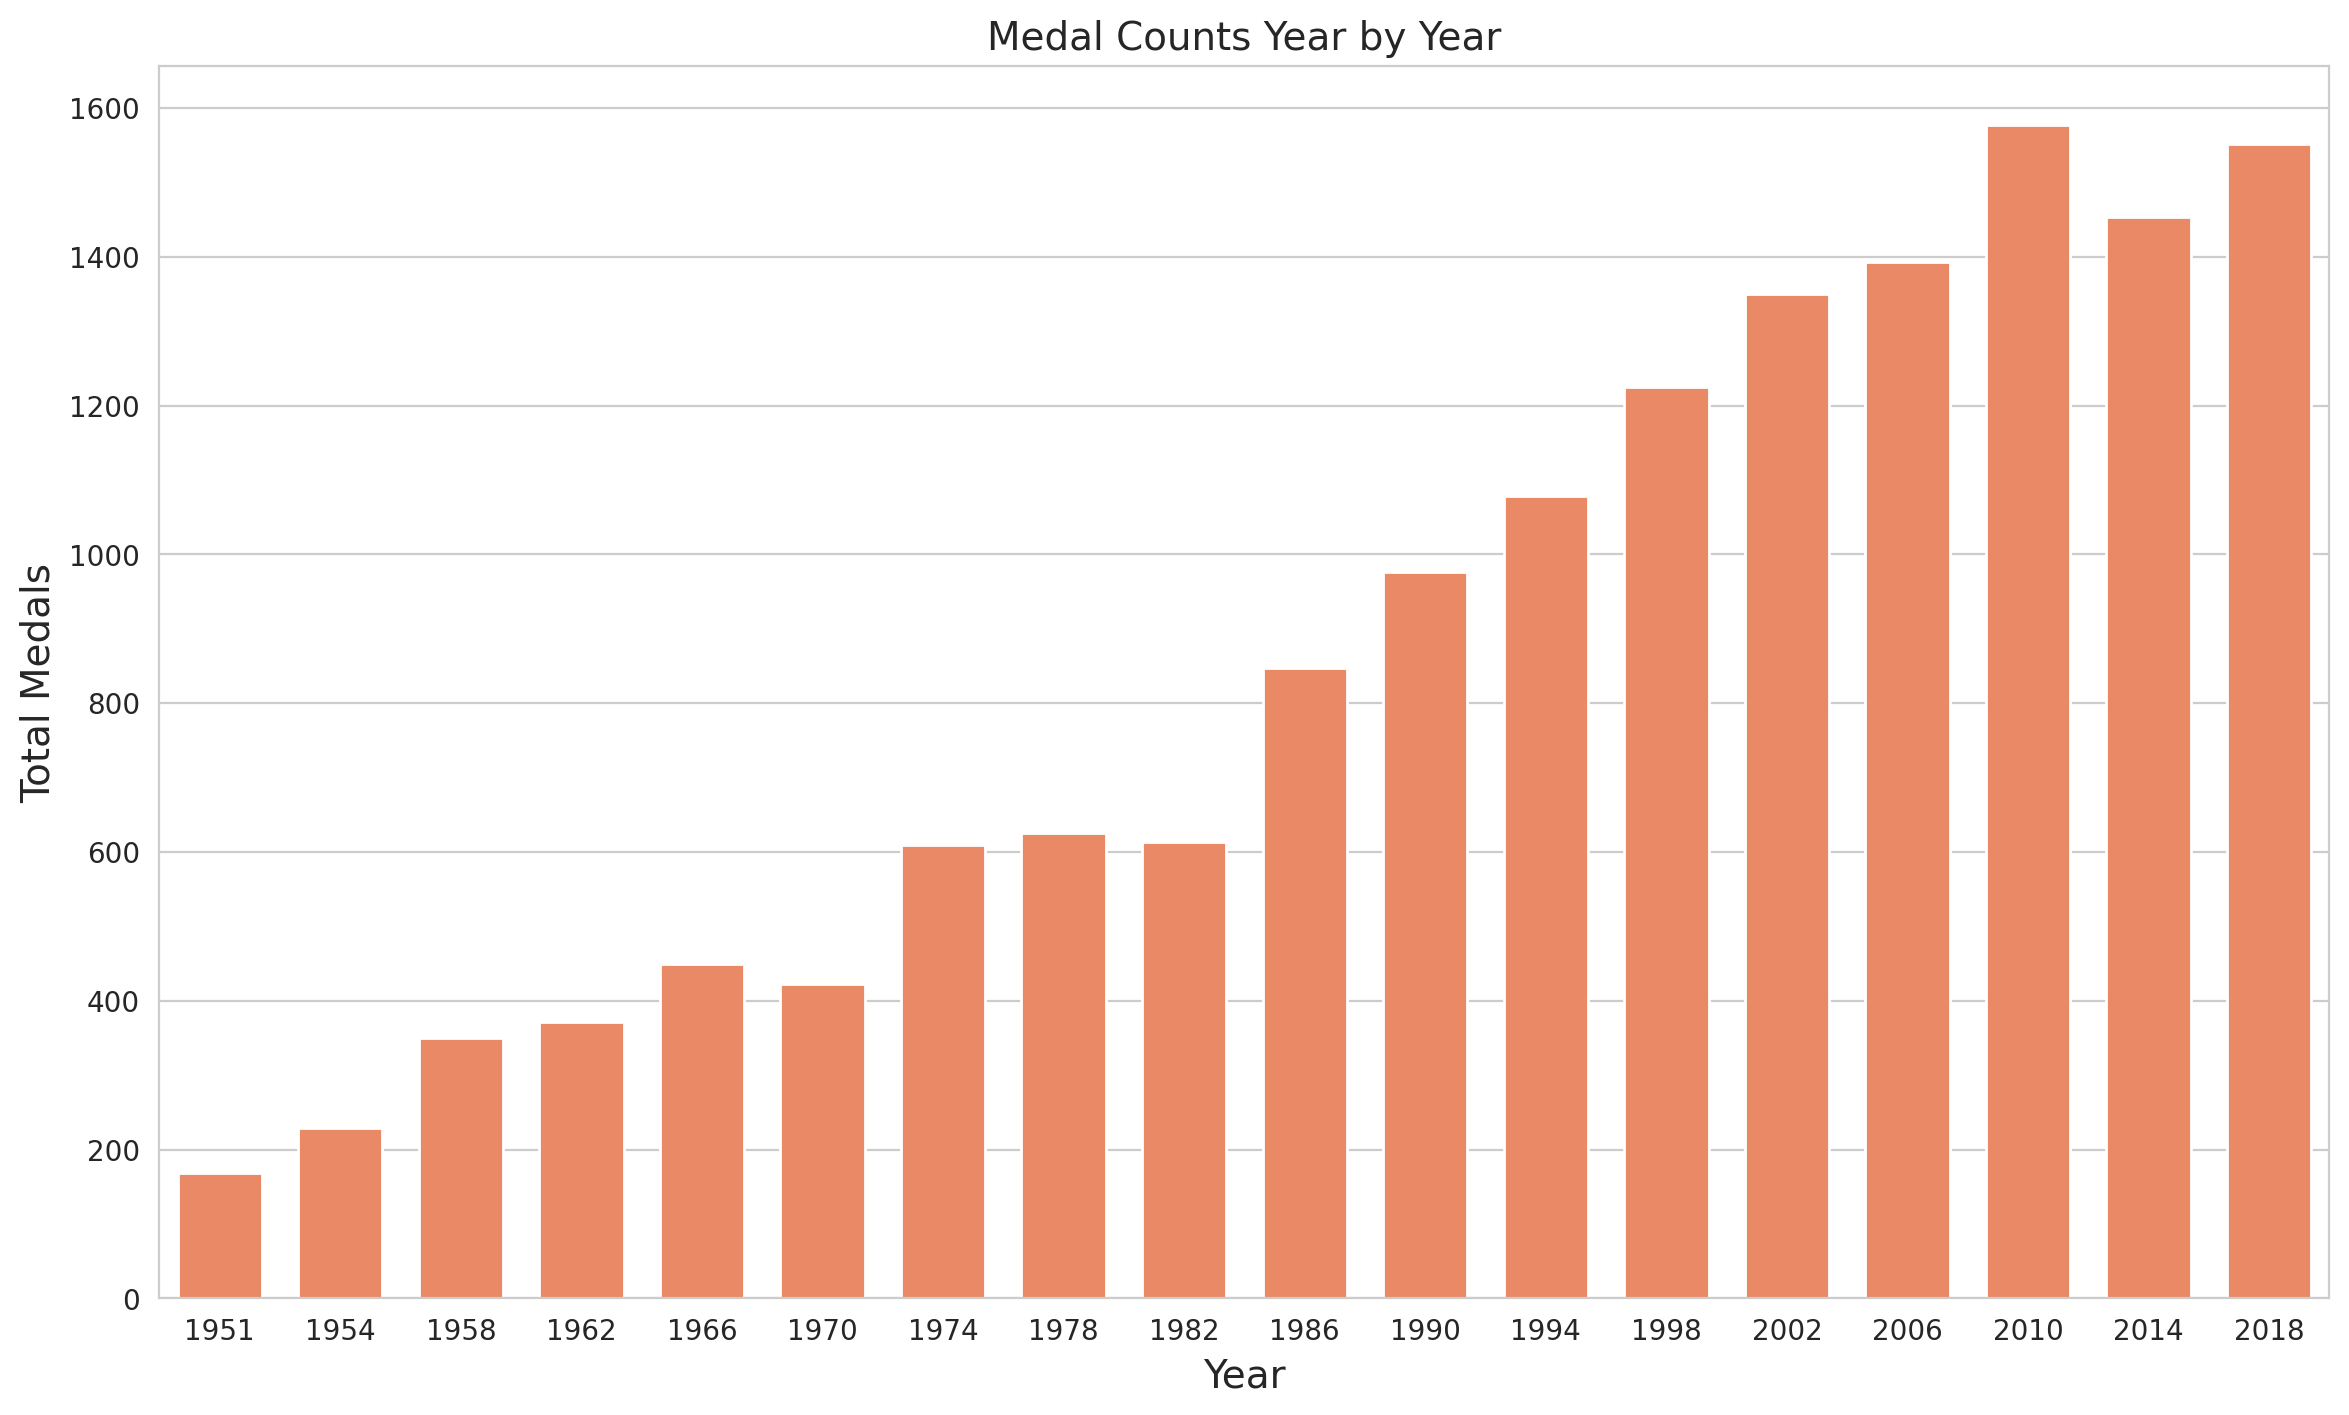

In [ ]:
plt.figure(figsize=(14, 8), dpi=200)
with sns.axes_style("whitegrid"):
  sns.barplot(medal_count_data,
          x="Year",
          y="Total",
          color='#FF7F50',
          width=0.7)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Medals", fontsize=14)

plt.title("Medal Counts Year by Year", fontsize=14)
plt.show()

We can see the medal count increased year by year. The increase can be due to many reasons, such as an increase in participation, the introduction of new game events, and new rules regarding medal distribution.

#Countries

Let's get to know the participation of countries in the Asian Games.

####Countries participating in the Asian Games by year

In [ ]:
no_countries = medal_tally_df.groupby("Year", as_index=False).agg({"NOC": pd.Series.count})
no_countries

,Year,NOC
0,1951,8
1,1954,13
2,1958,16
3,1962,15
4,1966,16
5,1970,16
6,1974,19
7,1978,19
8,1982,23
9,1986,22


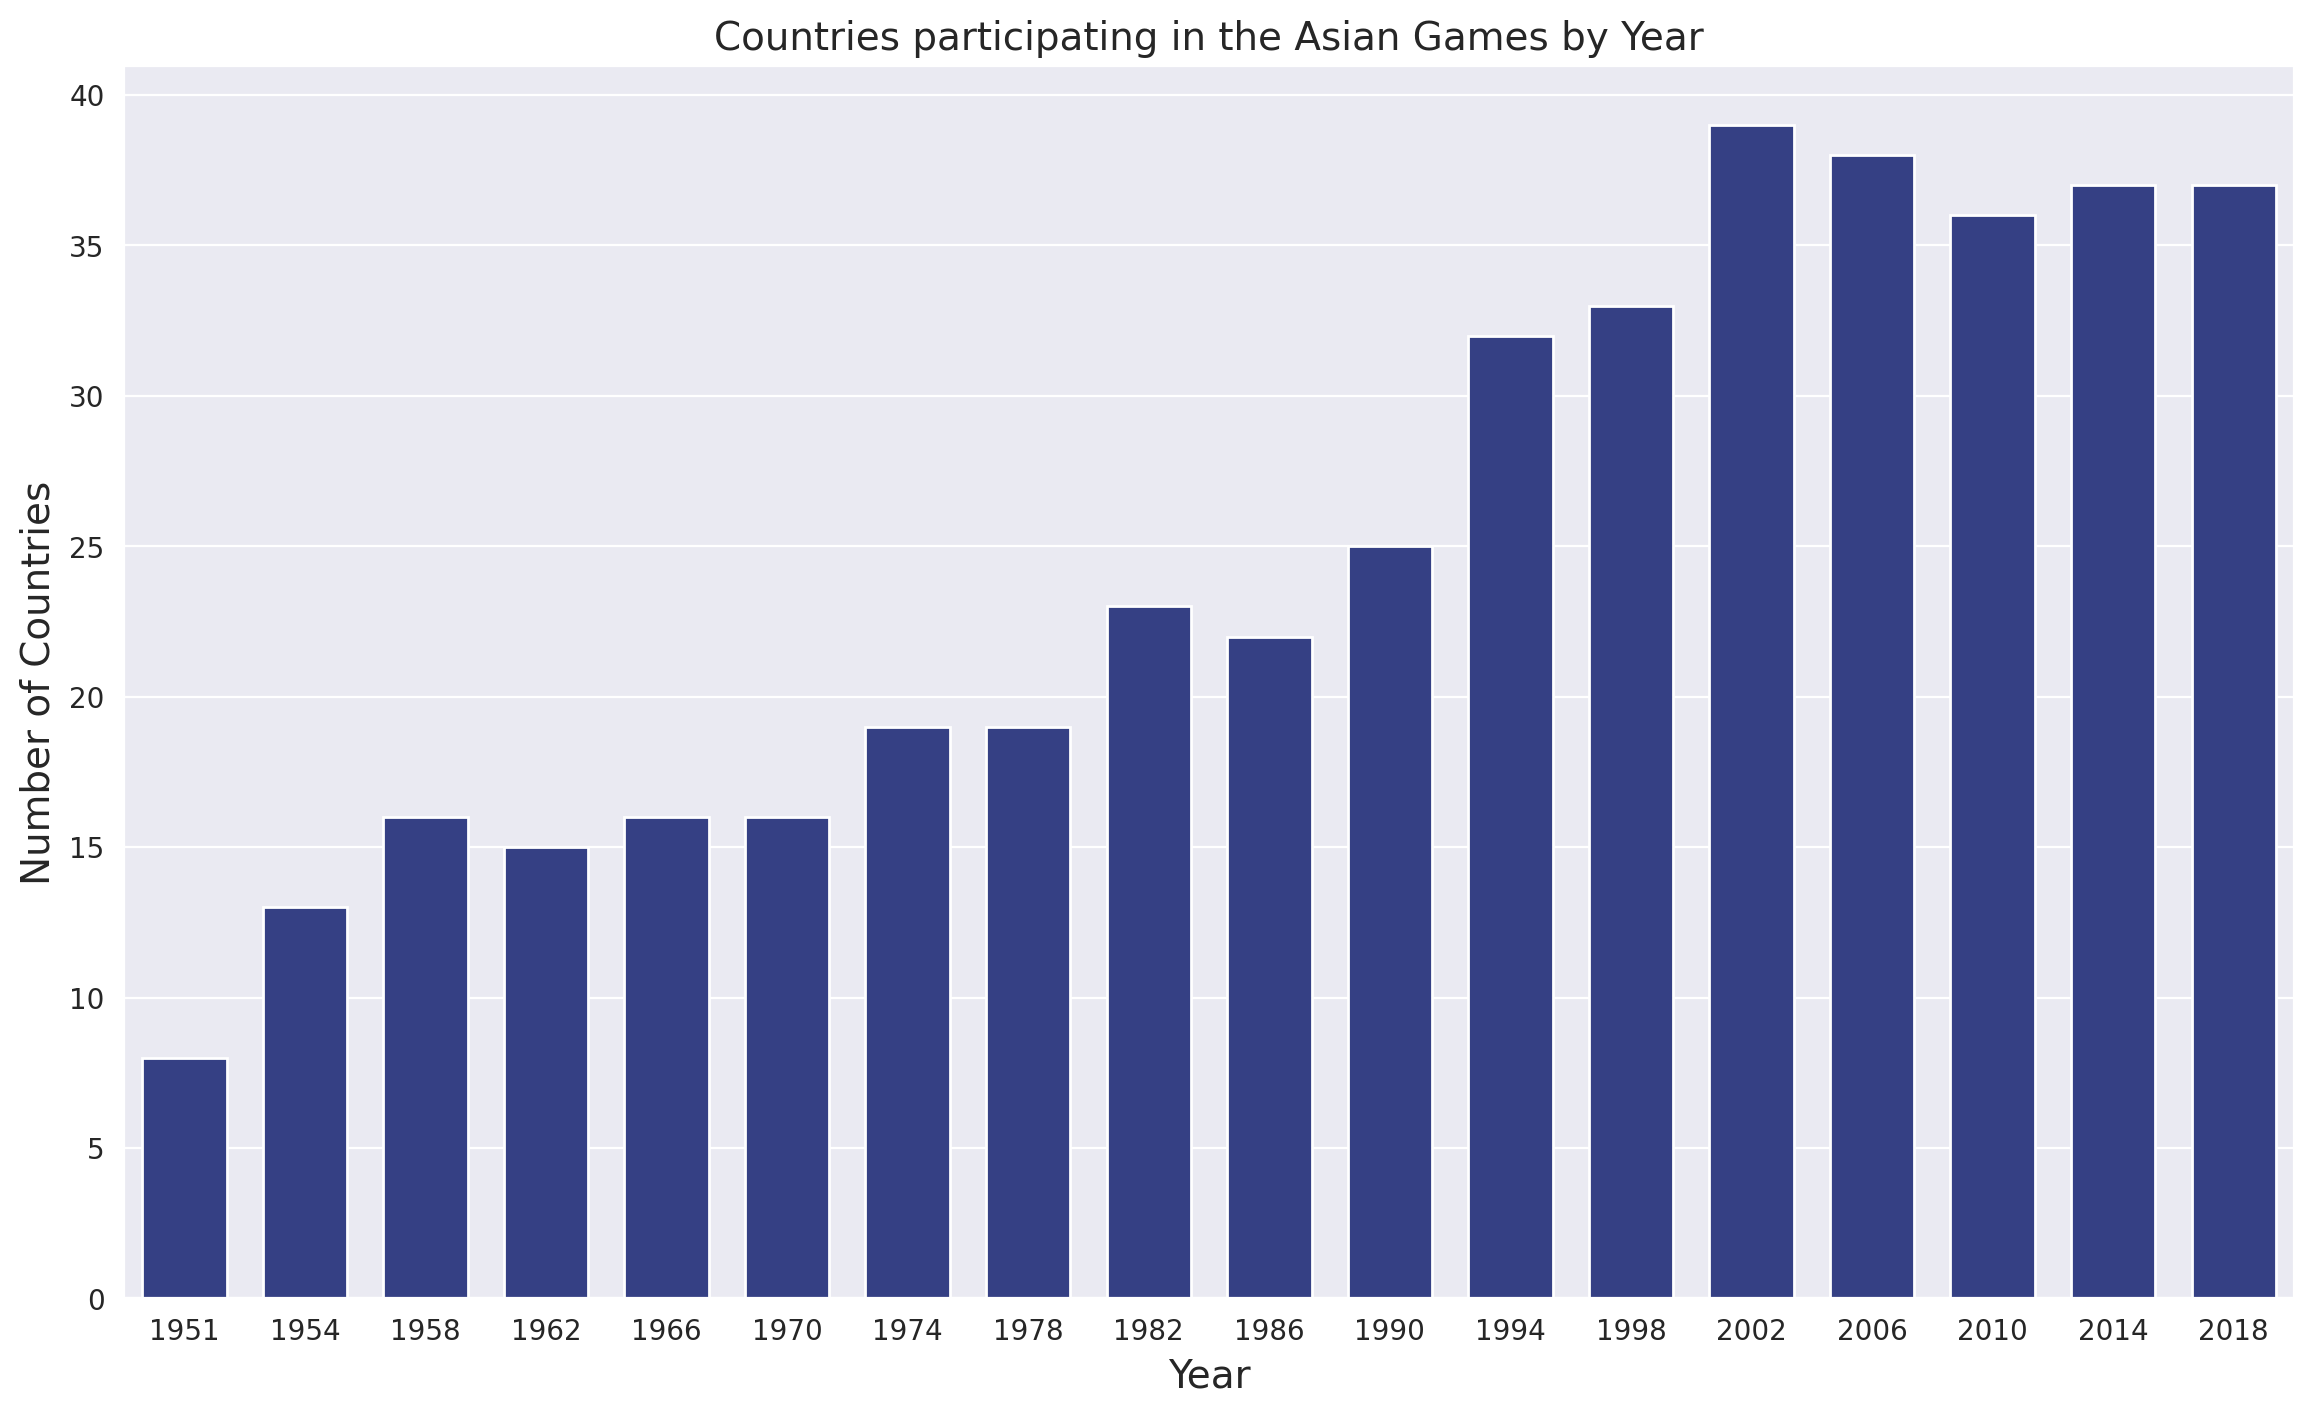

In [ ]:
plt.figure(figsize=(14, 8), dpi=200)
with sns.axes_style("darkgrid"):
  sns.barplot(no_countries,
               x="Year",
               y="NOC",
               color="#283791",
               width=0.7)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)

plt.title("Countries participating in the Asian Games by Year", fontsize=14)
plt.show()

We can analyze with this bar chart of an increase in participation over the years. The increase can be due to the following reasons:- <br>
- Globalization
- Nationalism
- Development of Sports infrastructure over the years

###Relationship between Medal Count Increase and Number of Countries Participating in Asian Games (Year by Year)

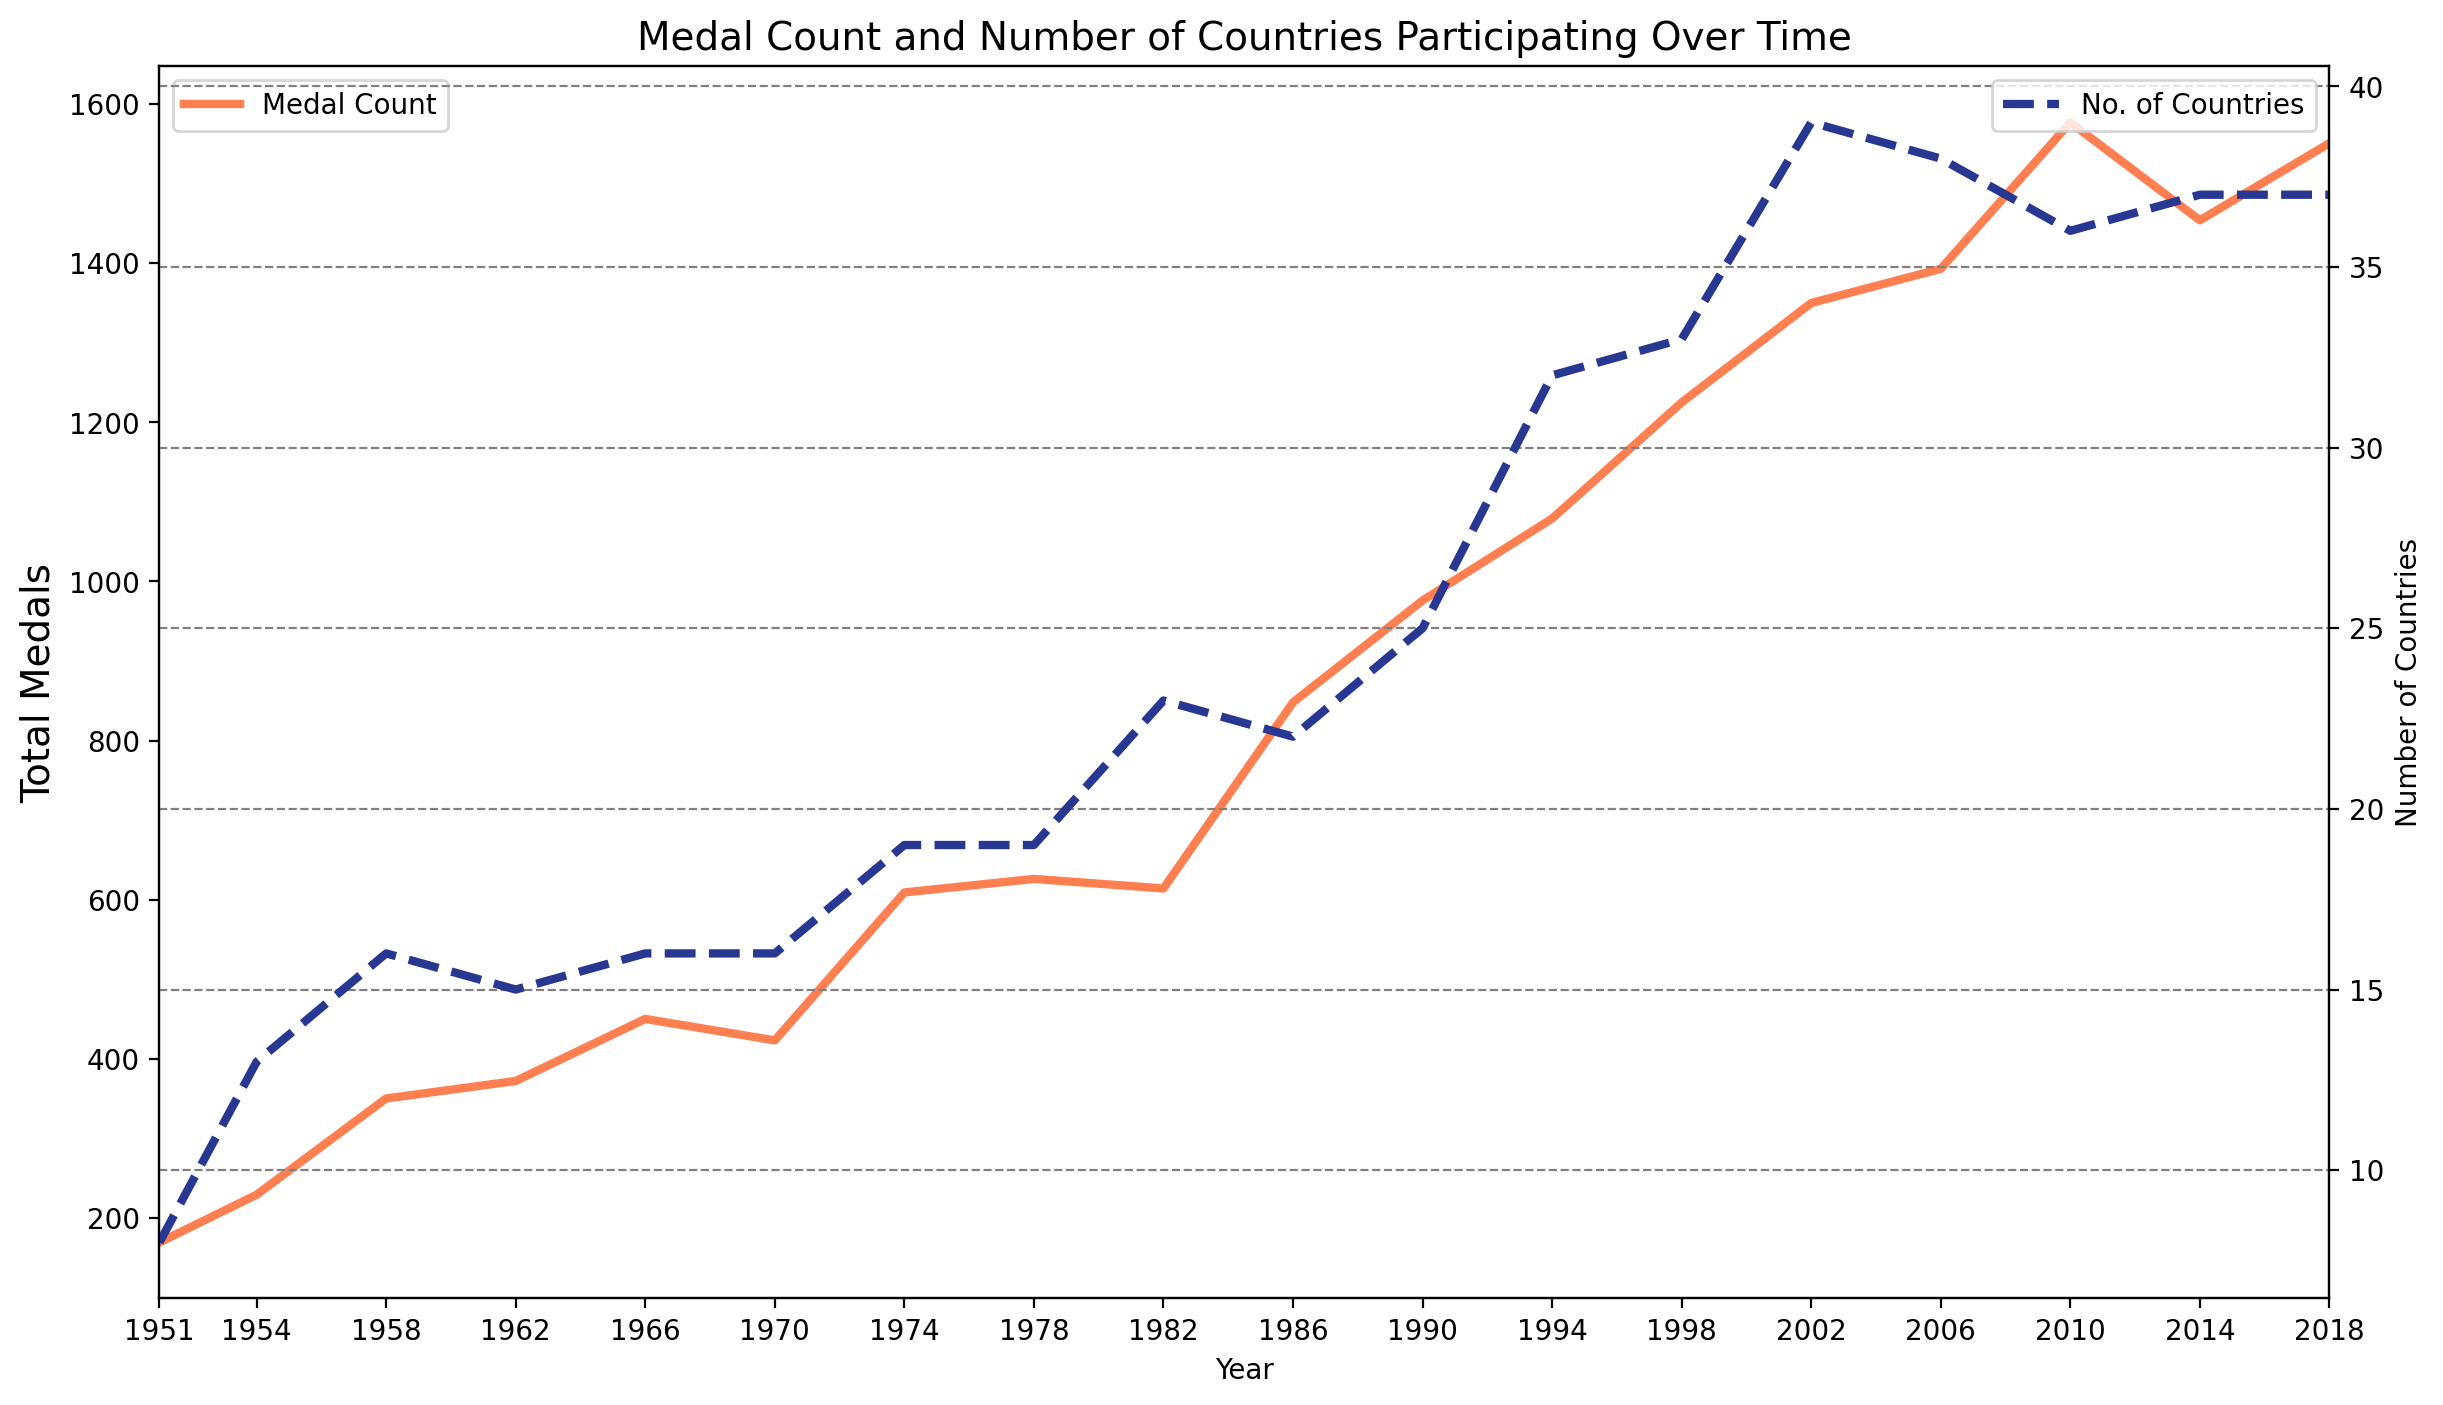

In [ ]:
years = np.insert(np.arange(1954, 2019, step=4), 0, 1951)
plt.figure(figsize=(14, 8), dpi=200)

ax1 = plt.gca()
ax2 = ax1.twinx()

plt.grid(color="grey", linestyle="--")

sns.lineplot(medal_count_data,
              x="Year",
              y="Total",
              color='#FF7F50',
              linewidth=3,
              ax=ax1,
              label="Medal Count")
sns.lineplot(no_countries,
              x="Year",
              y="NOC",
              color='#283791',
              linestyle="--",
              linewidth=3,
              ax=ax2,
              label='No. of Countries')

plt.xlabel("Year", fontsize=14)
ax1.set_ylabel("Total Medals", fontsize=14)
ax2.set_ylabel("Number of Countries")
plt.xticks(years)
plt.xlim(medal_count_data["Year"].min(), medal_count_data["Year"].max())
plt.title("Medal Count and Number of Countries Participating Over Time", fontsize=14)
plt.legend()
plt.show()

The increase in medal count appears to be positively correlated with the increase in the number of participating countries. However, it's important to note that this relationship may be influenced by additional factors such as the introduction of new events due to the development of sports infrastructure,  government supports and many more.

###Countries with Name Changes, Politics, Reunification, and Suspension: Historical Transitions





Beyond the Glory, By analyzing the medal tally, we can identify countries that have undergone name changes, mergers, or suspensions over the years.<br>
What 🤨 Medal tally is informing us about the history of Asian Countries.<br> Yes! Asian Games Medal Tally unveils the past that tells about the political dynamics.

In [ ]:
medal_tally_df.groupby("NOC", as_index=False).count()["NOC"]

0              Afghanistan (AFG)
1     Athletes from Kuwait (IOC)
2                  Bahrain (BRN)
3               Bangladesh (BAN)
4                   Brunei (BRU)
5                    Burma (BIR)
6                 Cambodia (CAM)
7                   Ceylon (CEY)
8                    China (CHN)
9           Chinese Taipei (TPE)
10               Hong Kong (HKG)
11                   India (IND)
12               Indonesia (INA)
13                    Iran (IRI)
14                    Iraq (IRQ)
15                  Israel (ISR)
16                   Japan (JPN)
17                  Jordan (JOR)
18              Kazakhstan (KAZ)
19          Khmer Republic (KHM)
20                   Korea (COR)
21                  Kuwait (KUW)
22              Kyrgyzstan (KGZ)
23                    Laos (LAO)
24                 Lebanon (LBN)
25                   Macau (MAC)
26                  Malaya (MAL)
27                Malaysia (MAS)
28                Mongolia (MGL)
29                 Myanmar (MYA)
30        

Name Change:-

- In the year 1989, The military government of Burma, which ruled the country at that time, announced the change in the English name of the country from "Burma" to "Myanmar".
- Cambodia was known as the Khmer Republic for a period in its history.

Politics:-

- In 1971, Due, to political issues, Taiwan(Republic of China) was prohibited from using or displaying any of its national symbols such as national name, anthem and flag. Therefore, "Chinese Taipei" term is used by the Republic of China (ROC) to participate in international organizations and events where the People's Republic of China (PRC) insists on its "One China" policy.


Separation:-

- Malaya was a region in Southeast Asia. This region was a British colony and later, It became part of the modern country of Malaysia. Singapore was part of Malaysia for a brief period but separated from Malaysia in 1965 to become an independent and sovereign nation.

Reunification:-

- South Vietnam existed as a separate political entity from 1955 to 1975. In 1975, it was reunified with North Vietnam, resulting in the formation of the modern-day Vietnam.

Suspension:-

- In 2010, Kuwait was suspended from participating in the 16th Asian Games, which were held in Guangzhou, China. As a result of the suspension, Kuwaiti athletes were not able to compete under their country's flag and named under "Athletes from Kuwait".






#Top 15 countries at Asian Games

In [ ]:
old_one = ["Burma (BIR)", "Khmer Republic (KHM)", "South Vietnam (VNM)", "Athletes from Kuwait (IOC)", "Republic of China (ROC)"]
new_one = ["Myanmar (MYA)", "Cambodia (CAM)", "Vietnam (VIE)", "Kuwait (KUW)", "Chinese Taipei (TPE)"]
for i in range(len(old_one)):
  medal_tally_df.loc[medal_tally_df["NOC"] == old_one[i], "NOC"] = new_one[i]

countries = medal_tally_df.groupby("NOC", as_index=False).agg({"Gold": pd.Series.sum, "Silver": pd.Series.sum, "Bronze": pd.Series.sum, "Total": pd.Series.sum})
countries.sort_values('Total', inplace=True)
top15_countries = countries[-15:]
top15_countries

,NOC,Gold,Silver,Bronze,Total
35,Singapore (SGP),41,59,116,216
8,Hong Kong (HKG),38,83,112,233
24,Malaysia (MAS),61,97,136,294
43,Uzbekistan (UZB),84,120,140,344
32,Philippines (PHI),67,114,230,411
28,North Korea (PRK),110,143,178,431
10,Indonesia (INA),91,119,246,456
7,Chinese Taipei (TPE),99,144,276,519
16,Kazakhstan (KAZ),155,158,244,557
11,Iran (IRI),179,181,197,557


In [ ]:
country_perf_df = pd.melt(top15_countries, id_vars=['NOC', 'Total'], var_name='Medal', value_name='Count')
medal_order = ['Gold', 'Silver', 'Bronze']
country_perf_df['Medal'] = pd.Categorical(country_perf_df['Medal'], categories=medal_order, ordered=True)
country_perf_df.sort_values(['Total'], inplace=True)
# country_perf_df.sort_values(["Total"], inplace=True)
country_perf_df = country_perf_df[["NOC", "Medal", "Count", "Total"]]
country_perf_df.reset_index(drop=True, inplace=True)

In [ ]:
filename = "medal_chart.png"
image_format = "png"
category_h_bar = px.bar(country_perf_df,
                        x='Count',
                        y='NOC',
                        color='Medal',
                        orientation='h',
                        title="Medal Distribution by Country")
category_h_bar.update_layout(xaxis_title="Medal Count",
                             yaxis_title="Country",
                             width=800,
                             height=600)

pio.write_image(category_h_bar, filename, format=image_format)

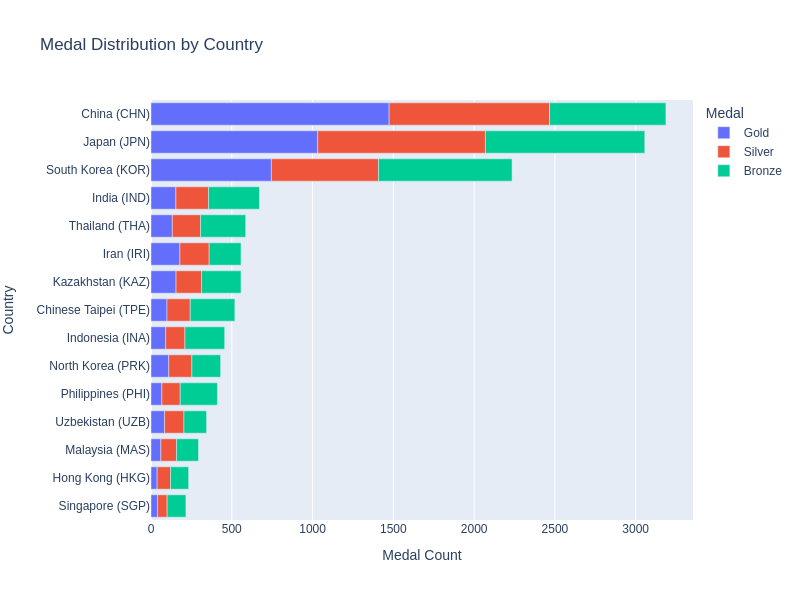

China, Japan, and South Korea have historically performed exceptionally well and often compete for the top positions in the medal tally in every Asian Games. It is only possible Due to their strong sports programs, large athlete pools, and significant financial investments in sports,

###Tracing the country's performance over the years
In this section, we will dive into the country's performance over the years. We will put together all the countries and compare their performance throughout all the organized Asian games.

In [ ]:
medals_by_year = medal_tally_df.groupby(["Year", "NOC"]).sum().groupby(level=[1]).cumsum()
medals_by_year.reset_index(inplace=True)

In [ ]:
filename = "Country_performance.png"
image_format = "png"

fig = px.line(medals_by_year,
              x="Year",
              y="Total",
              color="NOC",
              hover_name="NOC",
              title="Countries' Performance in Athletic Events")

fig.update_layout(xaxis_title="Year",
                  yaxis_title="Number of Medals",
                  width=900,
                  height=600)


pio.write_image(fig, filename, format=image_format)

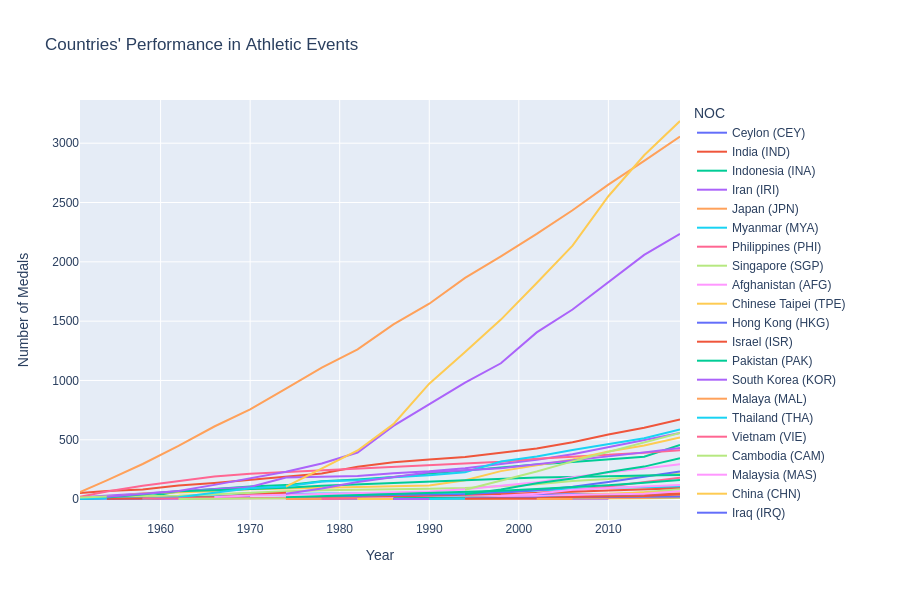

1.   The orange line represents Japan's performance in the Asian Games. Japan has consistently dominated these games over the years, maintaining a significant lead over other countries. But, It was before China started competing at the Asian Games.
2.   China's rise began in 1978, gradually setting itself apart from other countries in terms of performance. This marked a significant shift in the Asian Games landscape.
3. In the year 2014, represented by the yellow line, China made a remarkable breakthrough by surpassing Japan's total medal count.
4. By 1986, represented by the purple line, China had even surpassed South Korea, solidifying its position as a major contender in the Asian Games.

**China** still outperforms every country even after starting its Asian Games journey in 1974 😮

##Does the country enjoy host advantage?
In this section, we will study the Host Countries getting a significant advantage because Local athletes having knowledge of local venues can give host nations an edge, as athletes feel right at home.<br>We will compare their performance during the hosting year with their previous and subsequent years.

In [ ]:
host_country_data = {
    "Year": medals_by_year.groupby("Year").count().index,
    "Host Country": ["India (IND)", "Philippines (PHI)", "Japan (JPN)", "Indonesia (INA)", "Thailand (THA)", "Thailand (THA)", "Iran (IRI)", "Thailand (THA)", "India (IND)", "South Korea (KOR)", "China (CHN)", "Japan (JPN)", "Thailand (THA)", "South Korea (KOR)", "Qatar (QAT)", "China (CHN)", "South Korea (KOR)", "Indonesia (INA)"]
}


host_country_df = pd.DataFrame(host_country_data)
host_country_df

,Year,Host Country
0,1951,India (IND)
1,1954,Philippines (PHI)
2,1958,Japan (JPN)
3,1962,Indonesia (INA)
4,1966,Thailand (THA)
5,1970,Thailand (THA)
6,1974,Iran (IRI)
7,1978,Thailand (THA)
8,1982,India (IND)
9,1986,South Korea (KOR)


In [ ]:

Prev_Year = host_country_df["Year"] - 4
Next_Year = host_country_df["Year"] + 4

Prev_Year[1] = 1951
Next_Year[0] = 1954

Prev_Year_Performance = []
Next_Year_Performance = []
Host_Year_Performance = []

for i in range(len(host_country_df["Year"])):
    host_medal_condition = (medal_tally_df["Year"] == host_country_df["Year"][i]) & (medal_tally_df["NOC"] == host_country_df["Host Country"][i])
    if not host_medal_condition.any():
        Host_Year_Performance.append(None)
    else:
        Host_Year_Performance.append(medal_tally_df.loc[host_medal_condition, "Total"].values[0])

    prev_medal_condition = (medal_tally_df["Year"] == Prev_Year[i]) & (medal_tally_df["NOC"] == host_country_df["Host Country"][i])
    if not prev_medal_condition.any():
        Prev_Year_Performance.append(None)
    else:
        Prev_Year_Performance.append(medal_tally_df.loc[prev_medal_condition, "Total"].values[0])

    next_medal_condition = (medal_tally_df["Year"] == Next_Year[i]) & (medal_tally_df["NOC"] == host_country_df["Host Country"][i])
    if not next_medal_condition.any():
        Next_Year_Performance.append(None)
    else:
        Next_Year_Performance.append(medal_tally_df.loc[next_medal_condition, "Total"].values[0])

host_country_df["Previous Year Performance"] = Prev_Year_Performance
host_country_df["Host Year Performance"] = Host_Year_Performance
host_country_df["Next Year Performance"] = Next_Year_Performance


In [ ]:
host_country_df

,Year,Host Country,Previous Year Performance,Host Year Performance,Next Year Performance
0,1951,India (IND),NaN,51,17.00
1,1954,Philippines (PHI),19.00,45,48.00
2,1958,Japan (JPN),98.00,138,152.00
3,1962,Indonesia (INA),6.00,51,22.00
4,1966,Thailand (THA),12.00,37,39.00
5,1970,Thailand (THA),37.00,39,14.00
6,1974,Iran (IRI),23.00,81,NaN
7,1978,Thailand (THA),14.00,42,10.00
8,1982,India (IND),28.00,57,37.00
9,1986,South Korea (KOR),93.00,224,181.00


In the majority of the part(Later Asian Games), we can see that the Host country gets home advantage. But, we can't see the same during the earlier Asian Games.

#Athletics Performances
In this section, we will study which country excels at which athletic-based sports event. From sprints and relays to field events and marathons, we'll uncover which nations excel in specific disciplines.

In [ ]:
athletics_df = pd.read_csv("Athletics_record.csv", index_col=0)

####Exloring the dataset

In [ ]:
athletics_df

,Year,Gold,Silver,Bronze,Category,Sports
0,1951,IND,JPN,JPN,Men,100 m
1,1954,PAK,PHI,IND,Men,100 m
2,1958,PAK,JPN,PHI,Men,100 m
3,1962,INA,MAL,PHI,Men,100 m
4,1966,MAL,SIN,JPN,Men,100 m
...,...,...,...,...,...,...
727,2006,KAZ,IND,IND,Women,Heptathlon
728,2010,UZB,JPN,IND,Women,Heptathlon
729,2014,UZB,CHN,UZB,Women,Heptathlon
730,2018,IND,CHN,JPN,Women,Heptathlon


###Checking NaN values and duplicated values

In [ ]:
athletics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      732 non-null    int64 
 1   Gold      732 non-null    object
 2   Silver    732 non-null    object
 3   Bronze    717 non-null    object
 4   Category  732 non-null    object
 5   Sports    732 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.0+ KB


###Athletics events at the Asian Games

The dataset has the data of **28** athletic events

In [ ]:
athletics_df["Sports"].nunique()

28

The athletic events for which we have data are:

In [ ]:
athletics_df["Sports"].value_counts()

High jump              50
100 m                  36
4 × 100 m relay        36
Discus throw           36
Shot put               36
Long jump              36
200 m                  36
Javelin throw          36
800 m                  33
400 m                  32
4 × 400 m relay        31
1500 m                 31
400 m hurdles          29
Pole vault             27
10,000 m               27
Marathon               25
Triple jump            24
5000 m                 24
Hammer throw           23
3000 m steeplechase    22
100 m hurdles          18
Decathlon              18
110 m hurdles          18
20 km walk             16
Heptathlon             14
50 km walk              8
3000 m                  5
10,000 m walk           5
Name: Sports, dtype: int64

What Countries dominating which event

In [ ]:
athletics_data = athletics_df.groupby(["Sports", "Gold"], as_index=False).count()[["Sports", "Gold", "Category"]]
athletics_data.rename(columns={'Category': 'Count'}, inplace=True)

In [ ]:
filename = 'sunburst_performance.png'
image_format = 'png'

sunburst = px.sunburst(athletics_data,
                       path=["Sports", "Gold"],
                       values='Count',
                       color='Sports',
                       title="Countries Performance in Athletic Events")

sunburst.update_layout(xaxis_title='Number of Gold Medals',
                       yaxis_title='Country',
                       width=900,
                       height=650)

pio.write_image(sunburst, filename, format=image_format)


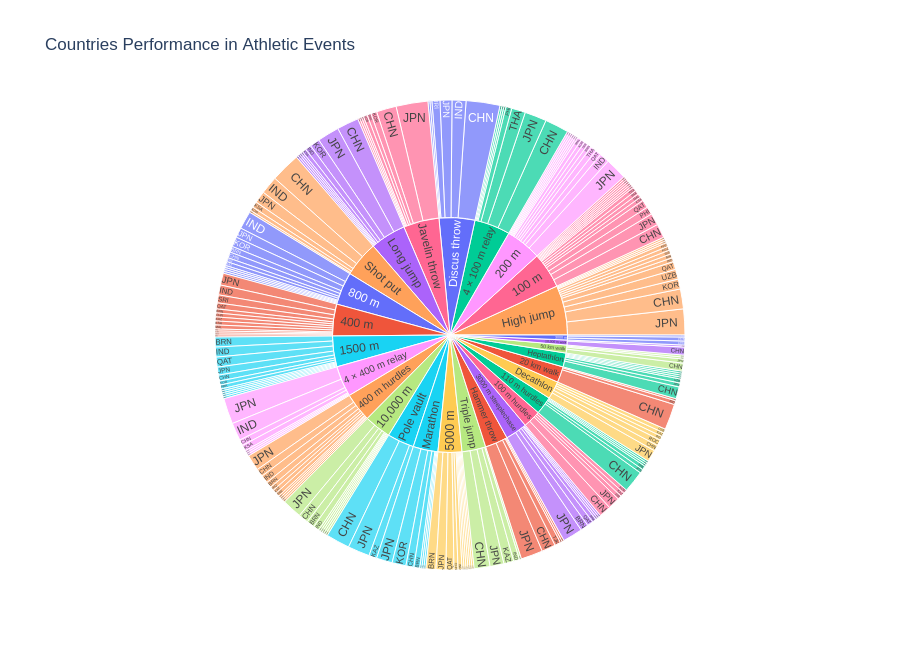

After observing the sunburst chart, it's evident that China and Japan dominate the athletic events.

**Athletic Dominance (China Vs Japan):**

(CHN) **China**:
- 100m
- 4x100m Relay
- Discus Throw
- Long Jump
- 110m hurdles
- 100m hurdles
- Shot Put
- 20km walk
- Pole Vault
- Triple Jump
---



(JPN) **Japan**:
- High Jump
- 200m
- Javelin Throw
- Hammer throw
- 400m hurdles
- 3000m Steeplechase
- Decathlon
- 400m
- 10,000m Race
- 4x400m Relay


###Understanding China's Dominance on sporting events


Despite China's late entry into the Asian Games in 1974, it consistently manages to surpass Japan in medal counts, even though the Asian Games began in 1951.<br>How is this achieved? China's excellence extends beyond the Asian Games, it also presents a formidable challenge to sporting giant USA at the Olympics. What are the reasons behind China's juggernaut status in sporting events?
- Whooping Sports Expenditure
- Gruelling Training Schedule
- International Coaching Staff
- Identifying talent based on physical attributes since childhood
- Strong Sense of belonging
- State Control

want to read it in detail:- https://www.indiatoday.in/magazine/cover-story/story/20080908-how-china-became-a-superpower-737410-2008-08-28

#What We learned after this analysis:-<br>
- We have learned a positive correlation between the increase in the medal count and the number of countries participating in the Asian Games.
- The Asian Games medal tally is evidence of historical narratives, tracing the intricate tapestry of nations in their quest for athletic excellence.
- We've compiled the performances of the top 15 countries, and China has outperformed them all since 1974.
- We've come to know that the host country performs better when it competes at its local venues.
- We have analyzed 28 athletic events at the Asian Games and found that the competition is primarily between China and Japan.